In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats
import math


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import statsmodels.api as sm

import pandas_datareader as pdr
from datetime import datetime
import requests
from io import StringIO

from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(n_samples=1000, centers=4,random_state=8, cluster_std=2.4)

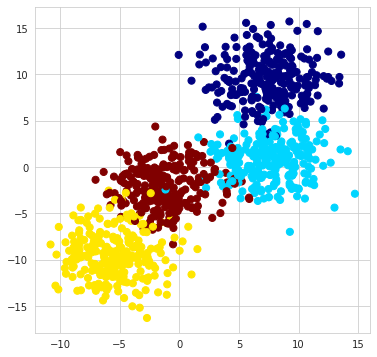

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='jet')

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet',shading='auto')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

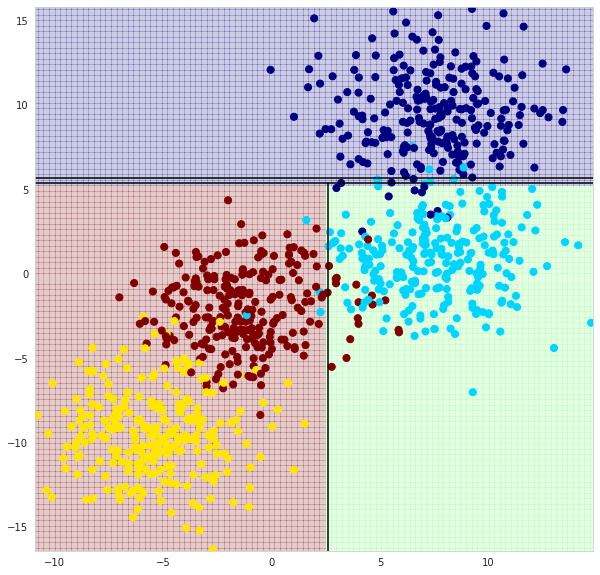

In [11]:
#lets see what it looks like with a depth of 2
clf=DecisionTreeClassifier(max_depth=2,random_state=0)
visualize_tree(clf,x,y)

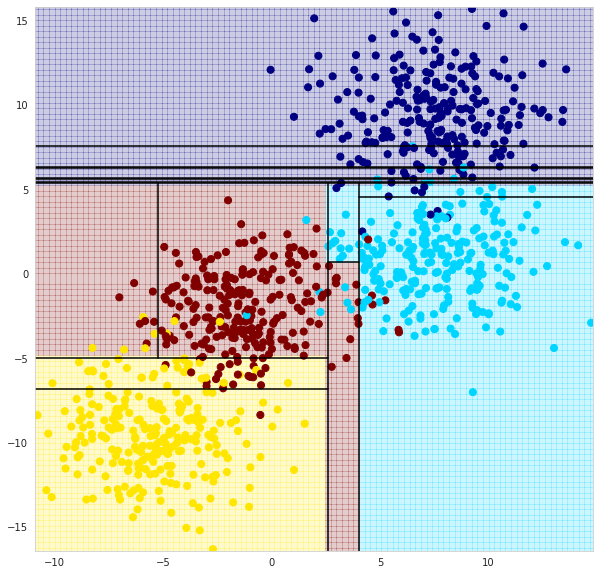

In [12]:
#lets see what it looks like with a depth of 4. Probably over fit
clf=DecisionTreeClassifier(max_depth=4,random_state=0)
visualize_tree(clf,x,y)

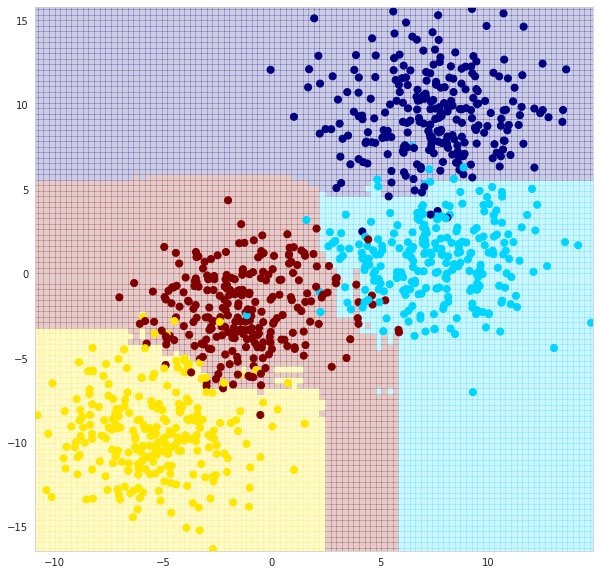

In [17]:
#overfitting can be overcome by using a forest rather than a single tree. Here we use 100. 400 is the upper limit, starts to overfit beyond that
#each tree in the forrest is independant
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state=0)
visualize_tree(clf,x,y,boundaries=False)

In [18]:
#make a fake sinusoidal fake dataset

=10*np.random.rand(100) #100 random

In [19]:
def sin_model(x,sigma=0.2):
    noise=sigma*np.random.rand(len(x))
    return np.sin(5*x)+np.sin(0.5*x)+noise

In [20]:
y=sin_model(x)

<ErrorbarContainer object of 3 artists>

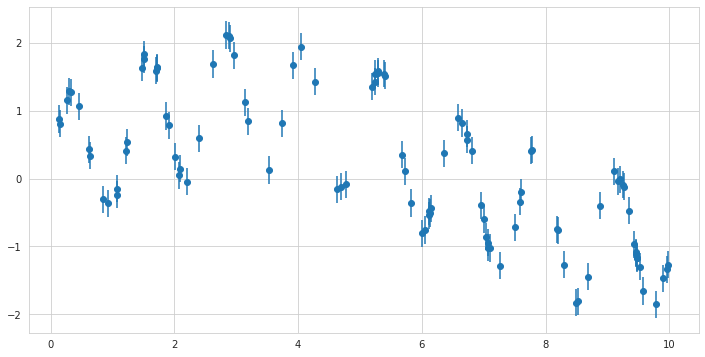

In [28]:
plt.figure(figsize=(12,6))
plt.errorbar(x,y,0.2,fmt='o')

In [38]:
#unsuitable for a liear regression, and timeconsuming to fit a polynomial. Random forrest can do regression
from sklearn.ensemble import RandomForestRegressor
xfit=np.linspace(0,10,1000)
rfr = RandomForestRegressor(100)
rfr.fit(x[:,None],y)
yfit=rfr.predict(xfit[:,None])

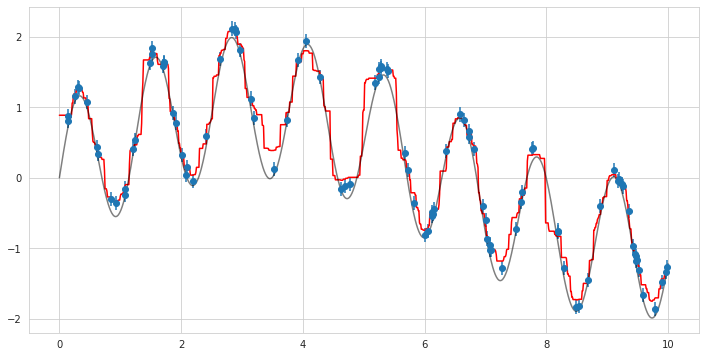

In [41]:
#we know the real model in this case, so lets plot it agains that
plt.figure(figsize=(12,6))
ytrue=sin_model(xfit,0)
plt.errorbar(x,y,0.1,fmt='o')
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k', alpha=0.5)

In [42]:
#manages to model the sinusoidal curve based only on the data we gave it. Probably only good interpolatively, will probabkly suck at extrapolation